# 유닛 딕셔너리 만들기

In [0]:
#units
pred_units = {}

#Command Center
pred_units['SCV'] = ['Command Center']

#Barracks
pred_units['Marine'] = ['Supply Depot','Barracks']
pred_units['Marauder'] = ['Supply Depot','Barracks']
pred_units['Reaper'] = ['Supply Depot','Barracks']
pred_units['Ghost'] = ['Supply Depot','Barracks','Ghost Academy']

#Factory
pred_units['Hellion'] = ['Supply Depot','Barracks','Factory']
pred_units['Widow Mine'] = ['Supply Depot','Barracks','Factory']
pred_units['Siege Tank'] = ['Supply Depot','Barracks','Factory']
pred_units['Cyclone'] = ['Supply Depot','Barracks','Factory']
pred_units['Hellbat'] = ['Supply Depot','Barracks','Factory','Armory']
pred_units['Thor'] = ['Supply Depot','Barracks','Factory','Armory']

#Starfort
pred_units['Viking'] = ['Supply Depot','Barracks','Factory','Starport']
pred_units['Medivac'] = ['Supply Depot','Barracks','Factory','Starport']
pred_units['Raven'] = ['Supply Depot','Barracks','Factory','Starport'] #밤까마귀
pred_units['Banshee'] = ['Supply Depot','Barracks','Factory','Starport']
pred_units['Liberator'] = ['Supply Depot','Barracks','Factory','Starport']
pred_units['Battlecruiser'] = ['Supply Depot','Barracks','Factory','Starport','Fusion Core']

#Building
pred_units['Command Center']=[]
pred_units['Supply Depot'] = []
pred_units['Refinery']= []

pred_units['Barracks'] =['Supply Depot']
pred_units['Ghost Academy'] = ['Supply Depot','Barracks']
pred_units['Bunker'] = ['Supply Depot','Barracks']
pred_units['Orbital Command'] = ['Supply Depot','Barracks']
pred_units['Factory'] = ['Supply Depot','Barracks']
pred_units['Armory'] = ['Supply Depot','Barracks','Factory']
pred_units['Starport'] = ['Supply Depot','Barracks','Factory']
pred_units['Fusion Core'] = ['Supply Depot','Barracks','Factory','Starport']

pred_units['Engineering Bay'] = ['Command Center']
pred_units['Planetary Fortress'] = ['Command Center','Engineering Bay']
pred_units['Sensor Tower'] = ['Command Center','Engineering Bay']
pred_units['Missile Turret'] = ['Command Center','Engineering Bay']

#Upgrade
pred_units['Infantry Weapons Level 1'] = ['Command Center','Engineering Bay']
pred_units['Infantry Weapons Level 2'] = ['Infantry Weapons Level 1','Command Center','Engineering Bay']
pred_units['Infantry Weapons Level 3'] = ['Infantry Weapons Level 2','Command Center','Engineering Bay']
pred_units['Infantry Armor Level 1'] = ['Command Center','Engineering Bay']
pred_units['Infantry Armor Level 2'] = ['Infantry Armor Level 1','Command Center','Engineering Bay']
pred_units['Infantry Armor Level 3'] = ['Infantry Armor Level 2','Command Center','Engineering Bay']
pred_units['Hi-Sec Auto Tracking'] = ['Command Center','Engineering Bay']
pred_units['Neosteel Armor'] = ['Command Center','Engineering Bay']
pred_units['Vehicle Weapons Level 1'] = ['Supply Depot','Barracks','Factory','Armory']
pred_units['Vehicle Weapons Level 2'] = ['Vehicle Weapons Level 1','Supply Depot','Barracks','Factory','Armory']
pred_units['Vehicle Weapons Level 3'] = ['Vehicle Weapons Level 2','Supply Depot','Barracks','Factory','Armory']
pred_units['Ship Weapons Level 1'] = ['Supply Depot','Barracks','Factory','Armory']
pred_units['Ship Weapons Level 2'] = ['Ship Weapons Level 1','Supply Depot','Barracks','Factory','Armory']
pred_units['Ship Weapons Level 3'] = ['Ship Weapons Level 2','Supply Depot','Barracks','Factory','Armory']
pred_units['Vehicle and Ship Plating Level 1'] = ['Supply Depot','Barracks','Factory','Armory']
pred_units['Vehicle and Ship Plating Level 2'] = ['Vehicle and Ship Plating Level 1','Supply Depot','Barracks','Factory','Armory']
pred_units['Vehicle and Ship Plating Level 3'] = ['Vehicle and Ship Plating Level 2','Supply Depot','Barracks','Factory','Armory']
pred_units['Personal Cloaking'] = ['Supply Depot','Barracks','Ghost Academy'] 
pred_units['Enhanced Shockwaves'] = ['Supply Depot','Barracks','Ghost Academy']
pred_units['Arm Silo With Nuke'] = ['Supply Depot','Barracks','Ghost Academy']

#Barracks
pred_units['Combat Shield'] = ['Supply Depot','Barracks']
pred_units['Stimpack'] = ['Supply Depot','Barracks']
pred_units['Concussive Shells'] = ['Supply Depot','Barracks']

#Factory
pred_units['Infernal Pre-Igniter'] = ['Supply Depot','Barracks','Factory']
pred_units['Mag-Field Accelerator'] = ['Supply Depot','Barracks','Factory']
pred_units['Drilling Claws'] = ['Supply Depot','Barracks','Factory']
pred_units['Smart Servos'] = ['Supply Depot','Barracks','Factory']

#Starfort
pred_units['Corvid Reactor'] = ['Supply Depot','Barracks','Factory','Starport']
pred_units['Cloaking Field'] = ['Supply Depot','Barracks','Factory','Starport']
pred_units['Hyperflight Rotors'] = ['Supply Depot','Barracks','Factory','Starport']

#Fusion Core
pred_units['Weapon Refit'] = ['Supply Depot','Barracks','Factory','Starport','Fusion Core']
pred_units['Advanced Ballistics'] = ['Supply Depot','Barracks','Factory','Starport','Fusion Core']
pred_units['Rapid Reignition System'] = ['Supply Depot','Barracks','Factory','Starport','Fusion Core']

# Right Click

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split

train = pd.read_pickle('/content/drive/My Drive/Colab Notebooks/data/데이콘/스타2/train.pkl')
test = pd.read_pickle('/content/drive/My Drive/Colab Notebooks/data/데이콘/스타2/test.pkl')

## 렐리포인트 출력
- 미네랄부스트, 가스부스트만 출력


- DestructibleSignsConstruction(가스 건물) -> 렐리포인트 지정할 때
   - 실존하는 유닛이 갈 때는 가스 건물 이름으로 나옴.(ex target: extractor)
- DestructibleSignsFunny(가스)
- Target: None (미네랄, 가스)


### 시간이 오래걸리는 방법

In [0]:
find_rely=train[train['event']==3][['game_id','player','event_contents','winner']]

In [0]:
find_rely.head()

In [0]:
find_rely['event_contents_rp']=find_rely['event_contents'].apply(lambda x: x.split(';')[0])
find_rely.head()

In [0]:
find_rely['find_Target']=find_rely['event_contents_rp'].apply(lambda x: x.split(':')[0])
find_rely.head()

In [0]:
find_rely=find_rely[find_rely['find_Target']=='Target']

In [0]:
find_rely['Target_content']=find_rely['event_contents_rp'].apply(lambda x: x.split(':')[1]).apply(lambda x: x[:-10])

In [0]:
find_rely.drop(['event_contents','event_contents_rp'],axis=1,inplace=True)

In [0]:
find_rely.head()

In [0]:
find_rely['Target_content'][121] # 공백이 있는 것으로 확인된다. 이것을 없애주어야할 것 같다.

In [0]:
find_rely['Target_content']=find_rely['Target_content'].apply(lambda x: x.strip())
find_rely['Target_content'][121]

In [0]:
find_rely['Target_content'].unique()

In [0]:
rely_frame=find_rely[(find_rely['Target_content'] == 'DestructibleSignsConstruction')|
          (find_rely['Target_content'] == 'DestructibleSignsFunny')|
          (find_rely['Target_content'] == 'None')]
rely_frame.head()

#### Player 0만 추출

In [0]:
rely_frame_0=rely_frame[rely_frame['player']==0]

In [0]:
rely_frame_0=rely_frame_0.groupby('game_id')['Target_content'].value_counts().reset_index(name='count')

In [0]:
rely_frame_0.head()

In [0]:
# 데이터 프레임을 만들기 위한 빈 딕셔너리 생성
player_0_dict ={}
player_0_dict['None']=[]
player_0_dict['DestructibleSignsConstruction']=[]
player_0_dict['DestructibleSignsFunny']=[]

None_list=[]
Con_list=[]
Fun_list=[]

In [0]:
rely_frame_0.game_id.unique()

In [0]:
# 시간 오래걸리는 방법
'''
for id in rely_frame_0.game_id.unique():
  if id % 10000==0:
    print(id)

  None_list.append(
      rely_frame_0[(rely_frame_0['game_id']==id)&
                   (rely_frame_0['Target_content']=="None")]['count'].values
  )
  Con_list.append(
      rely_frame_0[(rely_frame_0['game_id']==id)&
                   (rely_frame_0['Target_content']=="DestructibleSignsConstruction")]['count'].values
  )
  Fun_list.append(
      rely_frame_0[(rely_frame_0['game_id']==id)&
                   (rely_frame_0['Target_content']=="DestructibleSignsFunny")]['count'].values
  )
'''

### 시간 단축 방법

In [0]:
# player별 분리
train_0=train[train['player'] == 0]
train_1=train[train['player'] == 1]

In [0]:
def word_count(df,word):
  return (df['event_contents'].str.contains(word)==True).sum()

In [0]:
word_1 = 'DestructibleSignsConstruction'
word_2 = 'DestructibleSignsFunny'
word_3 = 'None'

t = train_0.groupby('game_id').apply(lambda x:word_count(x,word_1)).rename('count_{}'.format(word_1))
p = train_0.groupby('game_id').apply(lambda x:word_count(x,word_2)).rename('count_{}'.format(word_2))
q = train_0.groupby('game_id').apply(lambda x:word_count(x,word_3)).rename('count_{}'.format(word_3))

In [0]:
t=t.reset_index()
p=p.reset_index()
q=q.reset_index()

In [0]:
tpq_0 = t.merge(p,on='game_id').merge(q,on='game_id')

#중간 저장
tpq_0.to_csv('/content/drive/My Drive/Colab Notebooks/data/데이콘/스타2/tpq_0.csv')

In [0]:
# player 1도 똑같이 적용

word_1 = 'DestructibleSignsConstruction'
word_2 = 'DestructibleSignsFunny'
word_3 = 'None'

t = train_1.groupby('game_id').apply(lambda x:word_count(x,word_1)).rename('count_{}'.format(word_1))
p = train_1.groupby('game_id').apply(lambda x:word_count(x,word_2)).rename('count_{}'.format(word_2))
q = train_1.groupby('game_id').apply(lambda x:word_count(x,word_3)).rename('count_{}'.format(word_3))

t=t.reset_index()
p=p.reset_index()
q=q.reset_index()

tpq_1 = t.merge(p,on='game_id').merge(q,on='game_id')

#중간 저장
tpq_1.to_csv('/content/drive/My Drive/Colab Notebooks/data/데이콘/스타2/tpq_1.csv')

In [0]:
tpq_0.head()

In [0]:
tpq_1.head()

# Attack에 대한 EDA(승률이 올라갈 수 있는)
- 전반부: 일꾼에 대한 
- 중, 후반부: 생산건물(Barracks,Starport 등)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split

train = pd.read_pickle('/content/drive/My Drive/Colab Notebooks/data/데이콘/스타2/train.pkl')
test = pd.read_pickle('/content/drive/My Drive/Colab Notebooks/data/데이콘/스타2/test.pkl')

In [0]:
# 게임 시간에 대한 분포를 먼저 구해보자.
game_time=train.groupby('game_id')['time'].max().reset_index(name='time')

In [3]:
game_time['time'].value_counts()

9.0     13798
8.0      3665
7.0      3619
6.0      3397
4.0      3257
5.0      3227
10.0     2924
3.0      2596
2.0      1348
1.0       636
0.0       405
Name: time, dtype: int64

(array([  405.,   636.,  1348.,  2596.,  3257.,  3227.,  3397.,  3619.,
         3665., 16722.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       dtype=float32),
 <a list of 10 Patch objects>)

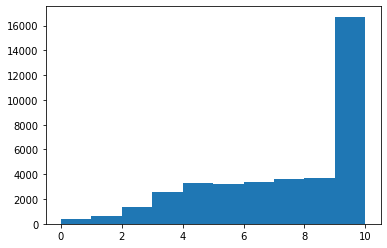

In [4]:
plt.hist(game_time['time'])

In [0]:
game_time=test.groupby('game_id')['time'].max().reset_index(name='time')

In [6]:
game_time['time'].value_counts()

9     5857
8     1602
7     1522
6     1513
4     1399
10    1315
5     1312
3     1168
2      609
1      286
0      204
Name: time, dtype: int64

(array([ 204.,  286.,  609., 1168., 1399., 1312., 1513., 1522., 1602.,
        7172.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

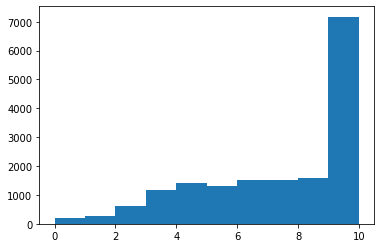

In [7]:
plt.hist(game_time['time'])

game_time의 분포를 살벼본 결과, 0분짜리 경기와 1분짜리 경기를 어떻게 해결해야할지 의문이 생긴다.

---
우선 train의 game_time을 기준으로 초반과 후반에 대한 기준을 새우자.
 - 이상치가 있기 때문에 중앙값을 사용

In [8]:
train_game_time=train.groupby('game_id')['time'].max().reset_index(name='time')
train_game_time['time'].median()

8.0

8분을 기준으로 초반과 후반을 나누어 공격에 대한 기준을 정해보자.

In [9]:
train.loc[train['time']<=8,'session'] = 0
train.loc[train['time']>8,'session'] = 1
train.head()

,game_id,winner,time,player,species,event,event_contents,session
0,0.0,1.0,0.0,0.0,0.0,0.0,"at (145.25, 21.5078125)",0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,"at (22.75, 147.0078125)",0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,['OrbitalCommand [3080001]'],0.0
3,0.0,1.0,0.0,0.0,0.0,2.0,(1360) - TrainSCV,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,"at (142.99609375, 24.50390625)",0.0


시간 적용 안해도 될 듯

 

---

## Attack 추출
- session :0 -> attack 자원 주변 (일단 본진 멀티 나누지 말고, None으로 된 것만 처리)
- session :1 -> attack 일꾼
- session :2 -> attack 건물
- session :3 -> attack 본진
- session :4 -> 상대 진영 렐리 추출

적 본진을 알려주는 새로운 컬럼을 만들자.

- train_camera_first=train.query('event==0').groupby(['game_id','player']).first()

In [0]:
train_camera_first=train.query('event==0')

In [11]:
# 상대 본진을 merge 시키기 위해 player 변경
train_camera_first.loc[train_camera_first['player']==0,
                       'player']=2
train_camera_first.loc[train_camera_first['player']==1,
                       'player']=3

train_camera_first.loc[train_camera_first['player']==2,
                       'player']=1
train_camera_first.loc[train_camera_first['player']==3,
                       'player']=0

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [0]:
train_camera_first=train_camera_first.groupby(['game_id','player']).first()

In [13]:
train=train.merge(train_camera_first['event_contents'],on=['game_id','player'])
train.head()

,game_id,winner,time,player,species,event,event_contents_x,session,event_contents_y
0,0.0,1.0,0.0,0.0,0.0,0.0,"at (145.25, 21.5078125)",0.0,"at (22.75, 147.0078125)"
1,0.0,1.0,0.0,0.0,0.0,1.0,['OrbitalCommand [3080001]'],0.0,"at (22.75, 147.0078125)"
2,0.0,1.0,0.0,0.0,0.0,2.0,(1360) - TrainSCV,0.0,"at (22.75, 147.0078125)"
3,0.0,1.0,0.0,0.0,0.0,0.0,"at (142.99609375, 24.50390625)",0.0,"at (22.75, 147.0078125)"
4,0.0,1.0,0.0,0.0,0.0,0.0,"at (142.5078125, 24.98828125)",0.0,"at (22.75, 147.0078125)"


In [14]:
# 데이터 합칠 껍데기 생성
final_merge=pd.DataFrame(index=train.game_id.unique(),
                         data={'game_id':train.game_id.unique()})
final_merge.head()

,game_id
0.0,0.0
1.0,1.0
2.0,2.0
3.0,3.0
4.0,4.0


## Session :0
 - Attack 자원 주변

In [15]:
attack_0 = train[train['event']==2]
attack_0.head()

,game_id,winner,time,player,species,event,event_contents_x,session,event_contents_y
2,0.0,1.0,0.0,0.0,0.0,2.0,(1360) - TrainSCV,0.0,"at (22.75, 147.0078125)"
18,0.0,1.0,0.0,0.0,0.0,2.0,"(1021) - BuildSupplyDepot; Location: (135.0, 4...",0.0,"at (22.75, 147.0078125)"
26,0.0,1.0,0.0,0.0,0.0,2.0,(480) - Stop,0.0,"at (22.75, 147.0078125)"
29,0.0,1.0,0.0,0.0,0.0,2.0,(1360) - TrainSCV,0.0,"at (22.75, 147.0078125)"
55,0.0,1.0,1.0,0.0,0.0,2.0,"(1023) - BuildBarracks; Location: (135.5, 39.5...",0.0,"at (22.75, 147.0078125)"


In [16]:
attack_0=attack_0[attack_0['event_contents_x'].str.contains('Attack; Target: None')]
attack_0['event_contents_x']=0
attack_0.head()

,game_id,winner,time,player,species,event,event_contents_x,session,event_contents_y
4765,2.0,0.0,8.0,1.0,2.0,2.0,0,0.0,"at (151.25, 20.5078125)"
6613,3.0,0.0,6.0,0.0,0.0,2.0,0,0.0,"at (24.75, 137.0078125)"
8043,3.0,0.0,4.0,1.0,1.0,2.0,0,0.0,"at (127.25, 27.5078125)"
10238,4.0,0.0,4.0,0.0,0.0,2.0,0,0.0,"at (163.25, 18.5078125)"
11378,5.0,0.0,0.0,0.0,1.0,2.0,0,0.0,"at (145.25, 21.5078125)"


In [0]:
attack_0=attack_0.groupby(['game_id','player'])['event_contents_x'].count().reset_index()

player_0=attack_0[attack_0['player']==0]
player_1=attack_0[attack_0['player']==1]

In [18]:
#player_0
final_merge=final_merge.merge(player_0[['game_id','event_contents_x']],on='game_id',how='left').merge(player_1[['game_id','event_contents_x']],on='game_id',how='left')
final_merge.head()

,game_id,event_contents_x_x,event_contents_x_y
0,0.0,NaN,NaN
1,1.0,NaN,NaN
2,2.0,NaN,1.0
3,3.0,1.0,1.0
4,4.0,1.0,NaN


In [19]:
final_merge.rename(columns={'event_contents_x_x':'0_자원공격',
                    'event_contents_x_y':'1_자원공격'},inplace=True)
final_merge.head()

,game_id,0_자원공격,1_자원공격
0,0.0,NaN,NaN
1,1.0,NaN,NaN
2,2.0,NaN,1.0
3,3.0,1.0,1.0
4,4.0,1.0,NaN


---

## Session :1
- attack 일꾼

In [20]:
attack_1 = train[(train['event']==2)|
                (train['event']==3)]
attack_1.head()

,game_id,winner,time,player,species,event,event_contents_x,session,event_contents_y
2,0.0,1.0,0.0,0.0,0.0,2.0,(1360) - TrainSCV,0.0,"at (22.75, 147.0078125)"
16,0.0,1.0,0.0,0.0,0.0,3.0,"Location: (136.3759765625, 41.11962890625, 49016)",0.0,"at (22.75, 147.0078125)"
17,0.0,1.0,0.0,0.0,0.0,3.0,"Location: (136.033935546875, 41.735107421875, ...",0.0,"at (22.75, 147.0078125)"
18,0.0,1.0,0.0,0.0,0.0,2.0,"(1021) - BuildSupplyDepot; Location: (135.0, 4...",0.0,"at (22.75, 147.0078125)"
26,0.0,1.0,0.0,0.0,0.0,2.0,(480) - Stop,0.0,"at (22.75, 147.0078125)"


In [21]:
# 내 일꾼 파생변수 제작
attack_1.loc[attack_1['species'] ==0,'My_Unit'] = 'SCV'
attack_1.loc[attack_1['species'] ==1,'My_Unit'] = 'Probe'
attack_1.loc[attack_1['species'] ==2,'My_Unit'] = 'Drone'

attack_1.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,game_id,winner,time,player,species,event,event_contents_x,session,event_contents_y,My_Unit
2,0.0,1.0,0.0,0.0,0.0,2.0,(1360) - TrainSCV,0.0,"at (22.75, 147.0078125)",SCV
16,0.0,1.0,0.0,0.0,0.0,3.0,"Location: (136.3759765625, 41.11962890625, 49016)",0.0,"at (22.75, 147.0078125)",SCV
17,0.0,1.0,0.0,0.0,0.0,3.0,"Location: (136.033935546875, 41.735107421875, ...",0.0,"at (22.75, 147.0078125)",SCV
18,0.0,1.0,0.0,0.0,0.0,2.0,"(1021) - BuildSupplyDepot; Location: (135.0, 4...",0.0,"at (22.75, 147.0078125)",SCV
26,0.0,1.0,0.0,0.0,0.0,2.0,(480) - Stop,0.0,"at (22.75, 147.0078125)",SCV


---

### event 2

In [22]:
# event_2 만 출력
event_2 = attack_1[attack_1['event']==2]
event_2 = event_2[(event_2['event_contents_x'].str.contains('Target: SCV'))|
                  (event_2['event_contents_x'].str.contains('Target: Probe'))|
                  (event_2['event_contents_x'].str.contains('Target: Drone'))]
event_2.head()

,game_id,winner,time,player,species,event,event_contents_x,session,event_contents_y,My_Unit
15605,7.0,0.0,5.0,1.0,1.0,2.0,(5A0) - Attack; Target: Drone [03900002]; Loca...,0.0,"at (24.75, 128.0078125)",Probe
15608,7.0,0.0,5.0,1.0,1.0,2.0,(5A0) - Attack; Target: Drone [03900002]; Loca...,0.0,"at (24.75, 128.0078125)",Probe
15610,7.0,0.0,5.0,1.0,1.0,2.0,(5A0) - Attack; Target: Drone [03F40001]; Loca...,0.0,"at (24.75, 128.0078125)",Probe
15651,7.0,0.0,5.0,1.0,1.0,2.0,(5A0) - Attack; Target: Drone [03C80001]; Loca...,0.0,"at (24.75, 128.0078125)",Probe
19525,10.0,0.0,2.0,0.0,1.0,2.0,(5A0) - Attack; Target: SCV [03580001]; Locati...,0.0,"at (31.75, 22.5078125)",Probe


#### player 0

In [0]:
player_0 = event_2[event_2['player']==0]
player_0=player_0.groupby('game_id')['My_Unit'].value_counts().reset_index(name='event2_0')

#### player 1

In [0]:
player_1 = event_2[event_2['player']==1]
player_1=player_1.groupby('game_id')['My_Unit'].value_counts().reset_index(name='event2_1')

#### merge

In [25]:
final_merge=final_merge.merge(player_0[['game_id','event2_0']],on='game_id',how='left')\
.merge(player_1[['game_id','event2_1']],on='game_id',how='left')
final_merge[['event2_0','event2_1']]=final_merge[['event2_0','event2_1']].fillna(0)
final_merge.head()

,game_id,0_자원공격,1_자원공격,event2_0,event2_1
0,0.0,NaN,NaN,0.0,0.0
1,1.0,NaN,NaN,0.0,0.0
2,2.0,NaN,1.0,0.0,0.0
3,3.0,1.0,1.0,0.0,0.0
4,4.0,1.0,NaN,0.0,0.0


---

### event 3

In [26]:
#event_3
# event_3= attack_1[(attack_1['event']==3)&
#                   (attack_1['event_contents_x'].str.contains('Target: SCV'))|
#                   (attack_1['event_contents_x'].str.contains('Target: Probe'))|
#                   (attack_1['event_contents_x'].str.contains('Target: Drone'))]

event_3= attack_1[attack_1['event']==3]
event_3 = event_3[(event_3['event_contents_x'].str.contains('Target: SCV'))|
                  (event_3['event_contents_x'].str.contains('Target: Probe'))|
                  (event_3['event_contents_x'].str.contains('Target: Drone'))]



event_3['target_name']=event_3['event_contents_x'].apply(lambda x: x.split(';')[0])
event_3['target_location']=event_3['event_contents_x'].apply(lambda x: x.split(';')[1])
event_3.drop('event_contents_x',axis=1,inplace=True)

event_3['event_contents_y']=event_3['event_contents_y'].apply(lambda x: x[5:-1].split(','))
event_3.rename(columns={'event_contents_y':'enemy_camp'},inplace=True)
event_3['target_name']=event_3['target_name'].apply(lambda x: x.split('[')[0].split(':')[-1])
event_3['target_location']=event_3['target_location'].apply(lambda x: x.split('(')[-1].strip(')').split(','))

event_3['My_Unit'] = event_3['My_Unit'].apply(lambda x: x.strip())
event_3['target_name'] = event_3['target_name'].apply(lambda x: x.strip())

event_3.head()

# '''
# 서로 종족이 다를 때
# 어떻게 처리해줘야할지
# 고민점
# '''

,game_id,winner,time,player,species,event,session,enemy_camp,My_Unit,target_name,target_location
1443,1.0,1.0,3.0,1.0,0.0,3.0,0.0,"[40.0, 162.0078125]",SCV,Probe,"[93.540283203125, 130.365966796875, 40922]"
1444,1.0,1.0,3.0,1.0,0.0,3.0,0.0,"[40.0, 162.0078125]",SCV,Probe,"[90.468017578125, 125.042236328125, 34283]"
3316,1.0,1.0,8.0,0.0,1.0,3.0,0.0,"[8.0, 18.5078125]",Probe,SCV,"[26.8935546875, 54.8740234375, 40912]"
3329,1.0,1.0,8.0,0.0,1.0,3.0,0.0,"[8.0, 18.5078125]",Probe,Probe,"[136.577880859375, 129.01611328125, 40912]"
5739,2.0,0.0,9.0,0.0,1.0,3.0,1.0,"[4.75, 128.0078125]",Probe,Probe,"[154.62109375, 75.6259765625, 40928]"


#### player 0

In [27]:
player_0 = event_3[event_3['player']==0]
player_0.head()

,game_id,winner,time,player,species,event,session,enemy_camp,My_Unit,target_name,target_location
3316,1.0,1.0,8.0,0.0,1.0,3.0,0.0,"[8.0, 18.5078125]",Probe,SCV,"[26.8935546875, 54.8740234375, 40912]"
3329,1.0,1.0,8.0,0.0,1.0,3.0,0.0,"[8.0, 18.5078125]",Probe,Probe,"[136.577880859375, 129.01611328125, 40912]"
5739,2.0,0.0,9.0,0.0,1.0,3.0,1.0,"[4.75, 128.0078125]",Probe,Probe,"[154.62109375, 75.6259765625, 40928]"
5742,2.0,0.0,9.0,0.0,1.0,3.0,1.0,"[4.75, 128.0078125]",Probe,Probe,"[155.310546875, 77.2666015625, 40928]"
5849,3.0,0.0,0.0,0.0,0.0,3.0,0.0,"[4.75, 137.0078125]",SCV,SCV,"[126.783935546875, 25.368896484375, 49136]"


In [28]:
# 내 종족과 상대 종족이 다른 경우
differ_unit= player_0[player_0['My_Unit'] != player_0['target_name']].groupby('game_id')['target_name'].value_counts().reset_index(name='count')
differ_unit

,game_id,target_name,count
0,1.0,SCV,1
1,3.0,Probe,7
2,10.0,SCV,2
3,13.0,Drone,4
4,23.0,SCV,4
...,...,...,...
9023,38841.0,Probe,1
9024,38846.0,SCV,3
9025,38847.0,SCV,2
9026,38868.0,Probe,3


In [29]:
# 내 종족과 상대 종족이 같은 경우
# 종족이 서로 같은 게임 인덱스만 출력
kk=train.groupby('game_id')['species'].nunique().reset_index()
same_index=list(kk[kk['species']==1]['game_id'].values)

# player 0만 출력
same_unit=player_0[player_0['game_id'].isin(same_index)]

same_unit['enemy_camp_x']= same_unit['enemy_camp'].apply(lambda x: float(x[0]))
same_unit['enemy_camp_y']= same_unit['enemy_camp'].apply(lambda x: float(x[1]))
same_unit['target_location_x']= same_unit['target_location'].apply(lambda x: float(x[0]))
same_unit['target_location_y']= same_unit['target_location'].apply(lambda x: float(x[1]))
same_unit.drop(['enemy_camp','target_location'],axis=1,inplace=True)

# 유클리디안 거리 30이하
same_unit['Euclid'] = np.sqrt((same_unit['enemy_camp_x']- same_unit['target_location_x'])**2+\
                              (same_unit['enemy_camp_y']- same_unit['target_location_y'])**2)
same_unit_30 = same_unit[same_unit['Euclid']<30]

same_unit_30=same_unit_30.groupby('game_id')['target_name'].value_counts().reset_index(name='count')
same_unit_30

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas

,game_id,target_name,count
0,111.0,Drone,1
1,161.0,Probe,6
2,203.0,SCV,1
3,215.0,Drone,1
4,279.0,Drone,4
...,...,...,...
866,38639.0,Probe,1
867,38680.0,Probe,5
868,38702.0,SCV,1
869,38714.0,SCV,7


##### merge

In [0]:
final_merge=final_merge.merge(differ_unit[['game_id','count']],on='game_id',how='left')\
.merge(same_unit_30[['game_id','count']],on='game_id',how='left')

In [0]:
final_merge[['count_x','count_y']]=final_merge[['count_x','count_y']].fillna(0)
final_merge['0_일꾼공격']= final_merge['count_x']+ final_merge['count_y']

In [32]:
final_merge.drop(['count_x','count_y'],axis=1,inplace=True)
final_merge.head()

,game_id,0_자원공격,1_자원공격,event2_0,event2_1,0_일꾼공격
0,0.0,NaN,NaN,0.0,0.0,0.0
1,1.0,NaN,NaN,0.0,0.0,1.0
2,2.0,NaN,1.0,0.0,0.0,0.0
3,3.0,1.0,1.0,0.0,0.0,7.0
4,4.0,1.0,NaN,0.0,0.0,0.0


#### player 1

In [33]:
player_1 = event_3[event_3['player']==1]
#player_1.head()

# 내 종족과 상대 종족이 다른 경우
differ_unit= player_1[player_1['My_Unit'] != player_1['target_name']].groupby('game_id')['target_name'].value_counts().reset_index(name='count')
differ_unit

# 내 종족과 상대 종족이 같은 경우
# 종족이 서로 같은 게임 인덱스만 출력
kk=train.groupby('game_id')['species'].nunique().reset_index()
same_index=list(kk[kk['species']==1]['game_id'].values)

# player 1만 출력
same_unit= player_1[player_1['game_id'].isin(same_index)]

same_unit['enemy_camp_x']= same_unit['enemy_camp'].apply(lambda x: float(x[0]))
same_unit['enemy_camp_y']= same_unit['enemy_camp'].apply(lambda x: float(x[1]))
same_unit['target_location_x']= same_unit['target_location'].apply(lambda x: float(x[0]))
same_unit['target_location_y']= same_unit['target_location'].apply(lambda x: float(x[1]))
same_unit.drop(['enemy_camp','target_location'],axis=1,inplace=True)

# 유클리디안 거리 30이하
same_unit['Euclid'] = np.sqrt((same_unit['enemy_camp_x']- same_unit['target_location_x'])**2+\
                              (same_unit['enemy_camp_y']- same_unit['target_location_y'])**2)
same_unit_30 = same_unit[same_unit['Euclid']<30]

same_unit_30=same_unit_30.groupby('game_id')['target_name'].value_counts().reset_index(name='count')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.py

##### merge

In [34]:
final_merge=final_merge.merge(differ_unit[['game_id','count']],on='game_id',how='left')\
.merge(same_unit_30[['game_id','count']],on='game_id',how='left')

final_merge[['count_x','count_y']]=final_merge[['count_x','count_y']].fillna(0)
final_merge['1_일꾼공격']= final_merge['count_x']+ final_merge['count_y']

final_merge.drop(['count_x','count_y'],axis=1,inplace=True)
final_merge.head()

,game_id,0_자원공격,1_자원공격,event2_0,event2_1,0_일꾼공격,1_일꾼공격
0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
1,1.0,NaN,NaN,0.0,0.0,1.0,2.0
2,2.0,NaN,1.0,0.0,0.0,0.0,0.0
3,3.0,1.0,1.0,0.0,0.0,7.0,0.0
4,4.0,1.0,NaN,0.0,0.0,0.0,0.0


### Final merge

In [35]:
final_merge['Attack_worker_0'] = final_merge['event2_0'] + final_merge['0_일꾼공격']
final_merge['Attack_worker_1'] = final_merge['event2_1'] + final_merge['1_일꾼공격']
final_merge.drop(['event2_0','event2_1','0_일꾼공격','1_일꾼공격'],axis=1,inplace=True)
final_merge.head()

,game_id,0_자원공격,1_자원공격,Attack_worker_0,Attack_worker_1
0,0.0,NaN,NaN,0.0,0.0
1,1.0,NaN,NaN,1.0,2.0
2,2.0,NaN,1.0,0.0,0.0
3,3.0,1.0,1.0,7.0,0.0
4,4.0,1.0,NaN,0.0,0.0


## Session:2
- Attack 건물
- 잠깐 어려우니 패스

## Session:3
- Attack 본진
- Target이 Location으로 잡혀있고 본진과 유클리드 30이내만

In [0]:
attack_3 = train[(train['event']==2)|
                (train['event']==3)]

In [37]:
attack_3.head()

,game_id,winner,time,player,species,event,event_contents_x,session,event_contents_y
2,0.0,1.0,0.0,0.0,0.0,2.0,(1360) - TrainSCV,0.0,"at (22.75, 147.0078125)"
16,0.0,1.0,0.0,0.0,0.0,3.0,"Location: (136.3759765625, 41.11962890625, 49016)",0.0,"at (22.75, 147.0078125)"
17,0.0,1.0,0.0,0.0,0.0,3.0,"Location: (136.033935546875, 41.735107421875, ...",0.0,"at (22.75, 147.0078125)"
18,0.0,1.0,0.0,0.0,0.0,2.0,"(1021) - BuildSupplyDepot; Location: (135.0, 4...",0.0,"at (22.75, 147.0078125)"
26,0.0,1.0,0.0,0.0,0.0,2.0,(480) - Stop,0.0,"at (22.75, 147.0078125)"


### event 2

In [0]:
event_2 = attack_3[attack_3['event'] ==2]

# SCV, Drone, Porbe를 뺀 모든 Attack 명령
event_2= event_2[(event_2['event_contents_x'].str.contains('Attack'))&
                 (event_2['event_contents_x'].str.contains('Location'))&
                 (event_2['event_contents_x'].str.contains('SCV')==False)&
                 (event_2['event_contents_x'].str.contains('Drone')==False)&
                 (event_2['event_contents_x'].str.contains('Probe')==False)]

In [39]:
event_2['target_location_x'] = event_2['event_contents_x'].apply(lambda x:float(x.split('Location:')[1][2:-8].split(',')[0]))
event_2['target_location_y'] = event_2['event_contents_x'].apply(lambda x:float(x.split('Location:')[1][2:-8].split(',')[1]))
event_2['enemy_camp_x']= event_2['event_contents_y'].apply(lambda x:float(x[4:-1].split(',')[0]))
event_2['enemy_camp_y']= event_2['event_contents_y'].apply(lambda x:float(x[4:-1].split(',')[1]))

event_2.drop(['event_contents_x','event_contents_y'],axis=1,inplace=True)

event_2.head()

,game_id,winner,time,player,species,event,session,target_location_x,target_location_y,enemy_camp_x,enemy_camp_y
742,0.0,1.0,3.0,1.0,0.0,2.0,0.0,13.541016,111.432617,145.25,21.507812
860,0.0,1.0,4.0,1.0,0.0,2.0,0.0,32.707764,148.977051,145.25,21.507812
1041,0.0,1.0,5.0,1.0,0.0,2.0,0.0,28.266357,122.276855,145.25,21.507812
1572,1.0,1.0,4.0,1.0,0.0,2.0,0.0,73.913818,86.790527,140.00,162.007812
1913,1.0,1.0,6.0,1.0,0.0,2.0,0.0,135.607178,131.279053,140.00,162.007812


In [40]:
event_2['player'].value_counts()

1.0    266419
0.0    264511
Name: player, dtype: int64

#### player 0

In [0]:
player_0 = event_2[event_2['player']==0]

In [42]:
# 유클리디안 거리 30이하
player_0['Euclid'] = np.sqrt((player_0['enemy_camp_x']- player_0['target_location_x'])**2+\
                             (player_0['enemy_camp_y']- player_0['target_location_y'])**2)

player_0_30 = player_0[player_0['Euclid']<30]
player_0_30
player_0_30=player_0_30.groupby('game_id')['player'].value_counts().reset_index(name='attack_enemy_camp_0')
player_0_30

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,game_id,player,attack_enemy_camp_0
0,3.0,0.0,2
1,6.0,0.0,2
2,10.0,0.0,7
3,20.0,0.0,4
4,21.0,0.0,1
...,...,...,...
14708,38851.0,0.0,2
14709,38854.0,0.0,1
14710,38859.0,0.0,3
14711,38867.0,0.0,1


#### player 1

In [43]:
player_1 = event_2[event_2['player']==1]

# 유클리디안 거리 30이하
player_1['Euclid'] = np.sqrt((player_1['enemy_camp_x']- player_1['target_location_x'])**2+\
                             (player_1['enemy_camp_y']- player_1['target_location_y'])**2)

player_1_30 = player_1[player_1['Euclid']<30]
player_1_30
player_1_30=player_1_30.groupby('game_id')['player'].value_counts().reset_index(name='attack_enemy_camp_1')
player_1_30

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,game_id,player,attack_enemy_camp_1
0,3.0,1.0,1
1,7.0,1.0,2
2,8.0,1.0,2
3,13.0,1.0,2
4,15.0,1.0,2
...,...,...,...
14770,38854.0,1.0,2
14771,38855.0,1.0,1
14772,38863.0,1.0,2
14773,38869.0,1.0,1


#### Final merge

In [0]:
final_merge = final_merge.merge(player_0_30[['game_id','attack_enemy_camp_0']],on='game_id',how='left')\
.merge(player_1_30[['game_id','attack_enemy_camp_1']],on='game_id',how='left')

In [45]:
final_merge

,game_id,0_자원공격,1_자원공격,Attack_worker_0,Attack_worker_1,attack_enemy_camp_0,attack_enemy_camp_1
0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
1,1.0,NaN,NaN,1.0,2.0,NaN,NaN
2,2.0,NaN,1.0,0.0,0.0,NaN,NaN
3,3.0,1.0,1.0,7.0,0.0,2.0,1.0
4,4.0,1.0,NaN,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
38878,38867.0,1.0,NaN,0.0,1.0,1.0,NaN
38879,38868.0,NaN,NaN,9.0,1.0,8.0,NaN
38880,38869.0,NaN,1.0,3.0,1.0,NaN,1.0
38881,38870.0,NaN,NaN,0.0,0.0,NaN,NaN


## Session :4 
- 상대 진영으로 렐리 추출 ('SetRallyPoint')

In [0]:
attack_4 = train[(train['event']==2)|
                 (train['event']==3)]

### event 2

In [70]:
event_2=attack_4[attack_4['event']==2]
event_2 = event_2[event_2['event_contents_x'].str.contains('SetRallyPoint')==True]

event_2['target_location_x'] = event_2['event_contents_x'].apply(lambda x:float(x.split('Location:')[1][2:-8].split(',')[0]))
event_2['target_location_y'] = event_2['event_contents_x'].apply(lambda x:float(x.split('Location:')[1][2:-8].split(',')[1]))
event_2['enemy_camp_x']= event_2['event_contents_y'].apply(lambda x:float(x[4:-1].split(',')[0]))
event_2['enemy_camp_y']= event_2['event_contents_y'].apply(lambda x:float(x[4:-1].split(',')[1]))

event_2.drop(['event_contents_x','event_contents_y'],axis=1,inplace=True)

event_2.head()

,game_id,winner,time,player,species,event,session,target_location_x,target_location_y,enemy_camp_x,enemy_camp_y
46869,26.0,0.0,1.0,1.0,2.0,2.0,0.0,143.728760,126.338379,31.750000,22.507812
73499,43.0,0.0,9.0,0.0,1.0,2.0,1.0,146.436035,25.163574,36.746094,122.007812
90725,56.0,1.0,3.0,1.0,1.0,2.0,0.0,139.794678,55.554688,22.750000,147.007812
91151,56.0,1.0,8.0,1.0,1.0,2.0,0.0,143.300537,46.161865,22.750000,147.007812
313627,194.0,0.0,2.0,1.0,1.0,2.0,0.0,47.494873,119.716309,163.250000,18.507812


#### player 0

In [0]:
player_0 = event_2[event_2['player']==0]

In [72]:
# 유클리디안 거리 30이하
player_0['Euclid'] = np.sqrt((player_0['enemy_camp_x']- player_0['target_location_x'])**2+\
                             (player_0['enemy_camp_y']- player_0['target_location_y'])**2)

player_0_30 = player_0[player_0['Euclid']<30]
player_0_30
player_0_30=player_0_30.groupby('game_id')['player'].value_counts().reset_index(name='event2_Rally_enemy_camp_0')
player_0_30

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,game_id,player,event2_Rally_enemy_camp_0
0,1996.0,0.0,1
1,2902.0,0.0,1
2,2960.0,0.0,1
3,3224.0,0.0,1
4,3621.0,0.0,1
...,...,...,...
61,36944.0,0.0,2
62,37100.0,0.0,1
63,37258.0,0.0,1
64,37808.0,0.0,1


#### player 1

In [0]:
player_1 = event_2[event_2['player']==1]

In [76]:
# 유클리디안 거리 30이하
player_1['Euclid'] = np.sqrt((player_1['enemy_camp_x']- player_1['target_location_x'])**2+\
                             (player_1['enemy_camp_y']- player_1['target_location_y'])**2)

player_1_30 = player_1[player_1['Euclid']<30]
player_1_30
player_1_30=player_1_30.groupby('game_id')['player'].value_counts().reset_index(name='event2_Rally_enemy_camp_1')
player_1_30

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,game_id,player,event2_Rally_enemy_camp_1
0,650.0,1.0,2
1,1227.0,1.0,1
2,1303.0,1.0,1
3,1506.0,1.0,1
4,1618.0,1.0,1
...,...,...,...
82,37700.0,1.0,1
83,38423.0,1.0,2
84,38527.0,1.0,1
85,38686.0,1.0,1


####  Merge

In [80]:
final_merge= final_merge.merge(player_0_30[['game_id','event2_Rally_enemy_camp_0']],on='game_id',how='left')\
.merge(player_1_30[['game_id','event2_Rally_enemy_camp_1']],on='game_id',how='left')

final_merge[['event2_Rally_enemy_camp_0','event2_Rally_enemy_camp_1']] = \
final_merge[['event2_Rally_enemy_camp_0','event2_Rally_enemy_camp_1']].fillna(0)

final_merge.head()

,game_id,0_자원공격,1_자원공격,Attack_worker_0,Attack_worker_1,attack_enemy_camp_0,attack_enemy_camp_1,event2_Rally_enemy_camp_0,event2_Rally_enemy_camp_1
0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0
1,1.0,NaN,NaN,1.0,2.0,NaN,NaN,0.0,0.0
2,2.0,NaN,1.0,0.0,0.0,NaN,NaN,0.0,0.0
3,3.0,1.0,1.0,7.0,0.0,2.0,1.0,0.0,0.0
4,4.0,1.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0


### event 3
- RallyPoint와 단순 Move의 구분점을 찾기가 힘듬.

In [81]:
event_3=attack_4[attack_4['event']==3]
event_3= event_3[event_3['event_contents_x'].str.contains('Target:')==False]

event_3['target_location_x'] = event_3['event_contents_x'].apply(lambda x:float(x.split('Location:')[1][2:-8].split(',')[0]))
event_3['target_location_y'] = event_3['event_contents_x'].apply(lambda x:float(x.split('Location:')[1][2:-8].split(',')[1]))
event_3['enemy_camp_x']= event_3['event_contents_y'].apply(lambda x:float(x[4:-1].split(',')[0]))
event_3['enemy_camp_y']= event_3['event_contents_y'].apply(lambda x:float(x[4:-1].split(',')[1]))

event_3.drop(['event_contents_x','event_contents_y'],axis=1,inplace=True)

event_3.head()

,game_id,winner,time,player,species,event,session,target_location_x,target_location_y,enemy_camp_x,enemy_camp_y
16,0.0,1.0,0.0,0.0,0.0,3.0,0.0,136.375977,41.119629,22.75,147.007812
17,0.0,1.0,0.0,0.0,0.0,3.0,0.0,136.033936,41.735107,22.75,147.007812
76,0.0,1.0,1.0,0.0,0.0,3.0,0.0,32.222900,153.720703,22.75,147.007812
77,0.0,1.0,1.0,0.0,0.0,3.0,0.0,29.195068,143.441650,22.75,147.007812
78,0.0,1.0,1.0,0.0,0.0,3.0,0.0,29.195068,129.534668,22.75,147.007812


#### player 0

In [0]:
player_0 = event_3[event_3['player']==0]

In [83]:
# 유클리디안 거리 30이하
player_0['Euclid'] = np.sqrt((player_0['enemy_camp_x']- player_0['target_location_x'])**2+\
                             (player_0['enemy_camp_y']- player_0['target_location_y'])**2)

player_0_30 = player_0[player_0['Euclid']<30]
player_0_30
player_0_30=player_0_30.groupby('game_id')['player'].value_counts().reset_index(name='event3_Rally_enemy_camp_0')
player_0_30

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,game_id,player,event3_Rally_enemy_camp_0
0,0.0,0.0,8
1,1.0,0.0,5
2,2.0,0.0,6
3,3.0,0.0,62
4,4.0,0.0,30
...,...,...,...
32503,38863.0,0.0,12
32504,38867.0,0.0,51
32505,38868.0,0.0,102
32506,38869.0,0.0,36


#### player 1

In [0]:
player_1 = event_3[event_3['player']==1]

In [87]:
# 유클리디안 거리 30이하
player_1['Euclid'] = np.sqrt((player_1['enemy_camp_x']- player_1['target_location_x'])**2+\
                             (player_1['enemy_camp_y']- player_1['target_location_y'])**2)

player_1_30 = player_1[player_1['Euclid']<30]
player_1_30
player_1_30=player_1_30.groupby('game_id')['player'].value_counts().reset_index(name='event3_Rally_enemy_camp_1')
player_1_30

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,game_id,player,event3_Rally_enemy_camp_1
0,1.0,1.0,17
1,2.0,1.0,14
2,3.0,1.0,19
3,4.0,1.0,4
4,5.0,1.0,8
...,...,...,...
32373,38867.0,1.0,7
32374,38868.0,1.0,2
32375,38869.0,1.0,25
32376,38870.0,1.0,15


####  Merge

In [88]:
final_merge= final_merge.merge(player_0_30[['game_id','event3_Rally_enemy_camp_0']],on='game_id',how='left')\
.merge(player_1_30[['game_id','event3_Rally_enemy_camp_1']],on='game_id',how='left')

final_merge[['event3_Rally_enemy_camp_0','event3_Rally_enemy_camp_1']] = \
final_merge[['event3_Rally_enemy_camp_0','event3_Rally_enemy_camp_1']].fillna(0)

final_merge.head()

,game_id,0_자원공격,1_자원공격,Attack_worker_0,Attack_worker_1,attack_enemy_camp_0,attack_enemy_camp_1,event2_Rally_enemy_camp_0,event2_Rally_enemy_camp_1,event3_Rally_enemy_camp_0,event3_Rally_enemy_camp_1
0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,8.0,0.0
1,1.0,NaN,NaN,1.0,2.0,NaN,NaN,0.0,0.0,5.0,17.0
2,2.0,NaN,1.0,0.0,0.0,NaN,NaN,0.0,0.0,6.0,14.0
3,3.0,1.0,1.0,7.0,0.0,2.0,1.0,0.0,0.0,62.0,19.0
4,4.0,1.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,30.0,4.0
